<a href="https://colab.research.google.com/github/Hali57/FUTURE_ML_02/blob/main/Predicting_SP500_Stock_Price_Using_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_25 (LSTM)                       │ (None, 60, 50)              │          10,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_25 (Dropout)                 │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_13               │ (None, 60, 50)              │             200 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_26 (LSTM)                       │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_26 (Dropout)                 │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,051 (121.29 KB)

 Trainable params: 30,951 (120.90 KB)

 Non-trainable params: 100 (400.00 B)

Epoch 1/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 10s 70ms/step - loss: 0.0935 - val_loss: 0.5455
Epoch 2/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 9s 51ms/step - loss: 0.0474 - val_loss: 0.5364
Epoch 3/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 6s 63ms/step - loss: 0.0353 - val_loss: 0.4608
Epoch 4/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 10s 67ms/step - loss: 0.0312 - val_loss: 0.3180
Epoch 5/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 9s 51ms/step - loss: 0.0248 - val_loss: 0.2218
Epoch 6/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 5s 64ms/step - loss: 0.0206 - val_loss: 0.0886
Epoch 7/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 10s 64ms/step - loss: 0.0197 - val_loss: 0.0622
Epoch 8/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 9s 54ms/step - loss: 0.0166 - val_loss: 0.0099
Epoch 9/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 6s 62ms/step - loss: 0.0146 - val_loss: 0.0041
Epoch 10/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 12s 81ms/step - loss: 0.0143 - val_loss: 0.0038
Epoch 11/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - loss: 0.0135 - val_loss: 0.0041
Epoch 12/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - loss:

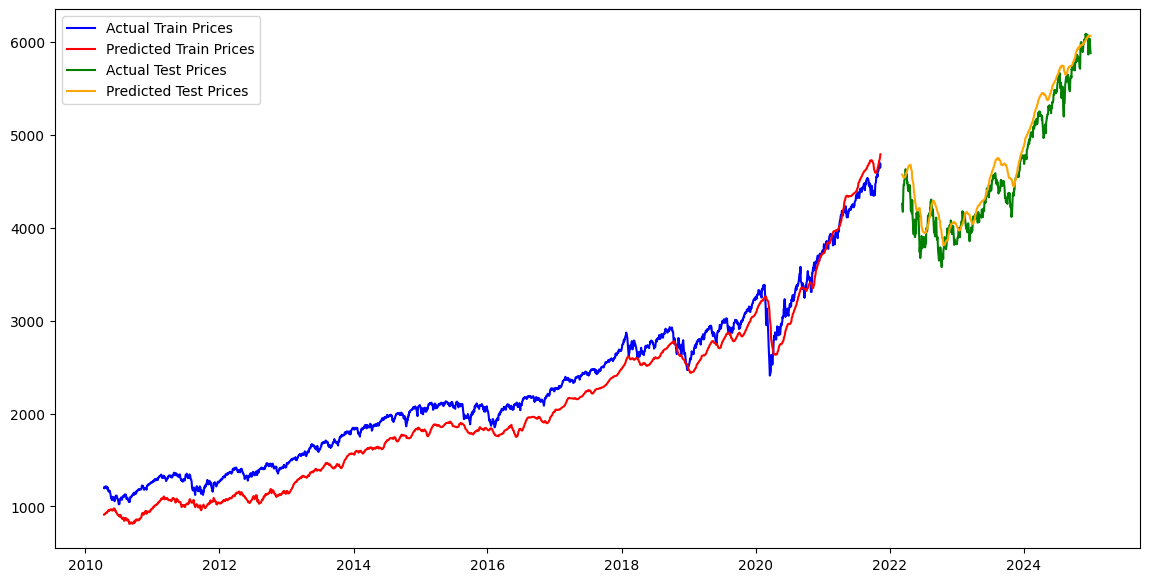

In [37]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Dropout, LSTM, BatchNormalization
from keras.models import Sequential
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam

# Download S&P 500 Data
ticker = "^GSPC"
df = yf.download(ticker, start="2010-01-01", end="2025-01-01")

df = df[['Close']]
df['Returns'] = df['Close'].pct_change() * 100
df['log_returns'] = np.log(1 + df['Returns'])
df.dropna(inplace=True)

# Train-Test Split
split = int(0.8 * len(df))
train_data, test_data = df[:split], df[split:]

# Separate Scalers for Close Prices
close_scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled_close = close_scaler.fit_transform(train_data[['Close']])
test_scaled_close = close_scaler.transform(test_data[['Close']])

# Separate Scaler for All Features
feature_scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = feature_scaler.fit_transform(train_data[['Close', 'log_returns']])
test_scaled = feature_scaler.transform(test_data[['Close', 'log_returns']])

# Time Steps Preparation
n = 60  # Look-back period
Xtrain, ytrain, Xtest, ytest = [], [], [], []

for i in range(n, len(train_scaled)):
    Xtrain.append(train_scaled[i-n:i, :])
    ytrain.append(train_scaled_close[i, 0])  # Only Close price target

for i in range(n, len(test_scaled)):
    Xtest.append(test_scaled[i-n:i, :])
    ytest.append(test_scaled_close[i, 0])

Xtrain, ytrain = np.array(Xtrain), np.array(ytrain)
Xtest, ytest = np.array(Xtest), np.array(ytest)

# Reshape Data for LSTM
Xtrain = Xtrain.reshape((Xtrain.shape[0], Xtrain.shape[1], Xtrain.shape[2]))
Xtest = Xtest.reshape((Xtest.shape[0], Xtest.shape[1], Xtest.shape[2]))

# Build Optimized LSTM Model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(Xtrain.shape[1], Xtrain.shape[2])))
model.add(Dropout(0.2))  # Dropout first
model.add(BatchNormalization())  # Then BatchNormalization
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Compile Model with Lower Learning Rate
opt = Adam(learning_rate=0.0001)
model.compile(optimizer=opt, loss='mse')
model.summary()

# Train Model with Early Stopping
early_stop = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
model.fit(Xtrain, ytrain, epochs=50, batch_size=32, validation_data=(Xtest, ytest), callbacks=[early_stop], verbose=1)

# Predictions
train_predict = model.predict(Xtrain)
test_predict = model.predict(Xtest)

# Inverse Transform Predictions
train_predict = close_scaler.inverse_transform(train_predict.reshape(-1, 1))[:, 0]
test_predict = close_scaler.inverse_transform(test_predict.reshape(-1, 1))[:, 0]

# Model Evaluation (RMSE)
rmse_train = np.sqrt(mean_squared_error(close_scaler.inverse_transform(ytrain.reshape(-1, 1))[:, 0], train_predict))
rmse_test = np.sqrt(mean_squared_error(close_scaler.inverse_transform(ytest.reshape(-1, 1))[:, 0], test_predict))

print(f'Training RMSE: {rmse_train}')
print(f'Testing RMSE: {rmse_test}')

# Plot Predictions
plt.figure(figsize=(14, 7))
plt.plot(df.index[n:split], close_scaler.inverse_transform(train_scaled_close)[n:], label='Actual Train Prices', color='blue')
plt.plot(df.index[n:split], train_predict, label='Predicted Train Prices', color='red')
plt.plot(df.index[split + n:], close_scaler.inverse_transform(test_scaled_close)[n:], label='Actual Test Prices', color='green')
plt.plot(df.index[split + n:], test_predict, label='Predicted Test Prices', color='orange')
plt.legend()
plt.show()


##FINDINGS
- The graph shows that the LSTM model is capable of predicting SP500 stock prices with a reasonable degree of accuracy, especially in capturing the overall trend. However, like any predictive model, it has limitations, particularly in predicting short-term fluctuations and extreme market movements.